# Phân tích mức tiêu hao nhiên liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mpg.csv')
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.shape

(398, 9)

## 1. ĐỌC DỮ LIỆU

Dữ liệu `mpg.csv` gồm các thông tin như sau:

- **mpg**: Miles/(US) gallon số gallon xăng trên 1 dặm
- **cylinders:** số lượng xilanh
- **displacement:**  Displacement/ dung tích xilanh (cu.in / $inches^3$)
- **horsepower:** công suất theo mã lực
- **weight:** trọng lượng (pound)
- **acceleration:** Gia tốc
- **model_year:** Năm sản xuất
- **origin:** Xuất xứ
- **name:** Tên dòng xe


## 2. TÌM HIỂU DỮ LIỆU

### 2.1 Kiểm tra có dòng nào không có dữ liệu?

In [22]:
missing_data = df[df.isnull().any(axis=1)]
print("Các dòng không có dữ liệu:")
print(missing_data)

Các dòng không có dữ liệu:
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin                  name  
32           71     usa            ford pinto  
126          74     usa         ford maverick  
330          80  europe  renault lecar deluxe  
336          80     usa    ford mustang cobra  
354          81  europe           renault 18i  
374          82     usa        amc concord dl  


### 2.2 Xóa các dòng không có dữ liệu


In [30]:
df.dropna()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [31]:
df.shape

(398, 9)

### 2.3 Tìm trung binh, trung vị của các thuộc tính: 'cylinders', 'horsepower', 'weight'

In [23]:
### 2.3 Tìm trung binh, trung vị của các thuộc tính: 'cylinders', 'horsepower', 'weight'
print("Trung bình của cylinders:", df['cylinders'].mean())
print("Trung vị của cylinders:", df['cylinders'].median())
print("Trung bình của horsepower:", df['horsepower'].mean())
print("Trung vị của horsepower:", df['horsepower'].median())
print("Trung bình của weight:", df['weight'].mean())
print("Trung vị của weight:", df['weight'].median())


Trung bình của cylinders: 5.454773869346734
Trung vị của cylinders: 4.0
Trung bình của horsepower: 104.46938775510205
Trung vị của horsepower: 93.5
Trung bình của weight: 2970.424623115578
Trung vị của weight: 2803.5


### 2.4 Tìm miền giá trị và miền phân vị của thuộc tính 'mpg'

In [33]:
mpg_min = df['mpg'].min()
mpg_max = df['mpg'].max()

print("Miền giá trị của thuộc tính 'mpg':", mpg_min, "-", mpg_max)

# Tìm miền phân vị của thuộc tính 'mpg'
mpg_quantiles = df['mpg'].quantile(0.25)
print("Miền phân vị của thuộc tính 'mpg':", mpg_quantiles)

Miền giá trị của thuộc tính 'mpg': 9.0 - 46.6
Miền phân vị của thuộc tính 'mpg': 17.5


## 3. SO SÁNH MỨC TIÊU HAO NHIÊN LIỆU TRUNG BÌNH CỦA CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

So sánh mức tiêu hao nhiên liệu trung bình của các dòng xe Mỹ, Nhật và Châu Âu

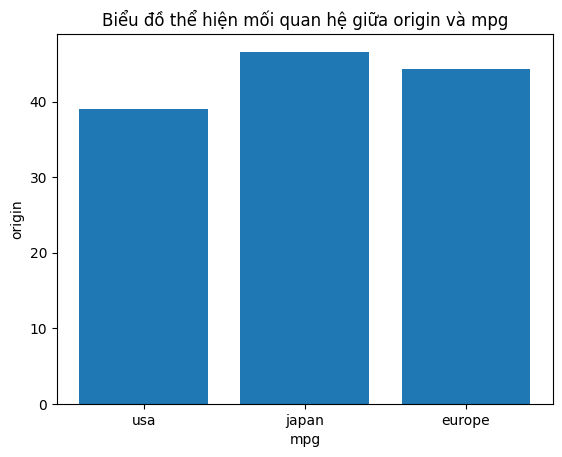

In [34]:
plt.bar(df['origin'], df['mpg'])
plt.title('Biểu đồ thể hiện mối quan hệ giữa origin và mpg')
plt.xlabel('mpg')
plt.ylabel('origin')
plt.show()

## 4. VẼ HISTOGRAM TRỌNG LƯỢNG CÁC XE

Text(0.5, 0, 'weight')

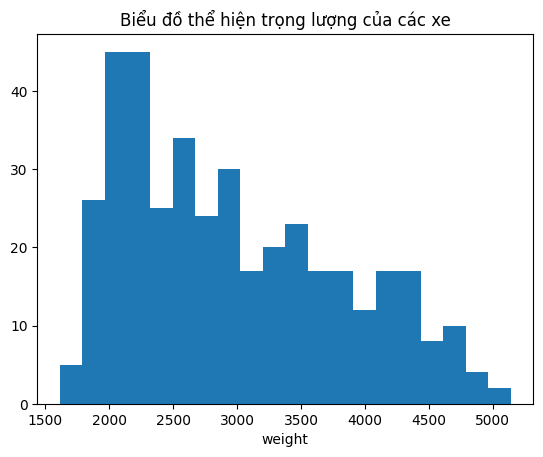

In [36]:

# VẼ HISTOGRAM TRỌNG LƯỢNG CÁC XE
plt.hist(df['weight'], bins=20)
plt.title('Biểu đồ thể hiện trọng lượng của các xe')
plt.xlabel('weight')



## 5. TÍNH TỶ LỆ CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

In [42]:
# Tính tỷ lệ các dòng xe dựa trên xuất xứ
origin_counts = df['origin'].value_counts()
print("Tỷ lệ các dòng xe dựa trên xuất xứ:")
print(origin_counts *100 / df['origin'].count())

Tỷ lệ các dòng xe dựa trên xuất xứ:
origin
usa       62.562814
japan     19.849246
europe    17.587940
Name: count, dtype: float64


## 6. VẼ BOXPLOT SO SÁNH CÔNG SUẤT CỦA CÁC DÒNG XE THẬP NIÊN 70, 80

Lưu ý: Các dòng xe thập niên 70 (1970 - 1979), thập niên 80 (1980 - 1989)

Text(0, 0.5, 'mpg')

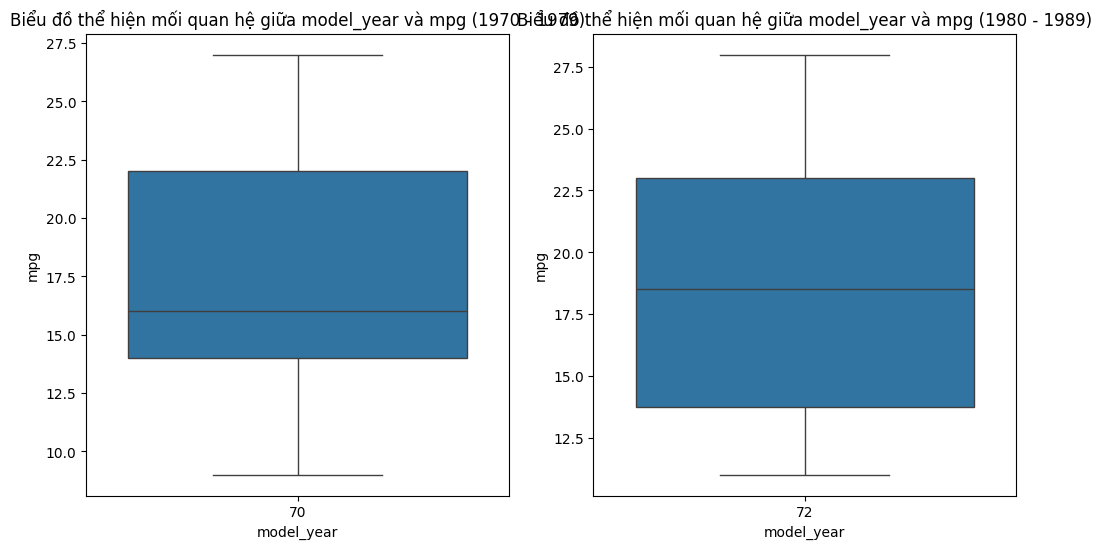

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Lưu ý: Các dòng xe thập niên 70 (1970 - 1979), thập niên 80 (1980 - 1989)

# Vẽ boxplot cho năm 1970
df_70s = df.model_year.between(70, 79)
sns.boxplot(x='model_year', y='mpg', data=df_70, ax=axes[0])
axes[0].set_title('Biểu đồ thể hiện mối quan hệ giữa model_year và mpg (1970 - 1979)')
axes[0].set_xlabel('model_year')
axes[0].set_ylabel('mpg')

# Vẽ boxplot cho năm 1980
df_80s = df.model_year.between(80, 89)

sns.boxplot(x='model_year', y='mpg', data=df_80, ax=axes[1])
axes[1].set_title('Biểu đồ thể hiện mối quan hệ giữa model_year và mpg (1980 - 1989)')
axes[1].set_xlabel('model_year')
axes[1].set_ylabel('mpg')



## 7. KHẢO SÁT MỨC TIÊU HAO NHIÊN LIỆU

### 7.1 Với số lượng xi lanh

Thử vẽ bằng đồ thị scatter plot.

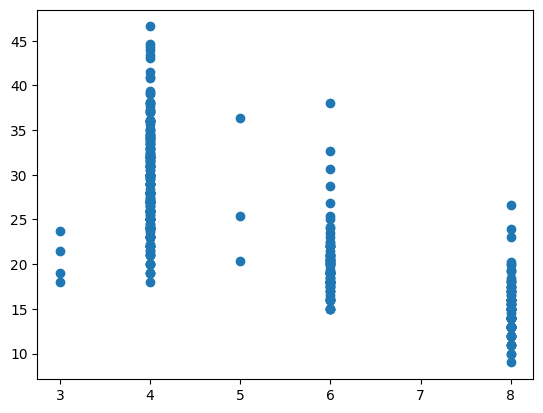

In [66]:
plt.scatter(df['cylinders'], df['mpg'])


### 7.2 Với công suất theo mã lực

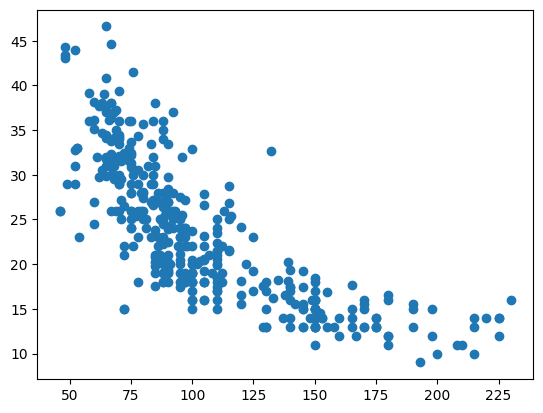

In [67]:
# Với công suất theo mã lực
plt.scatter(df['horsepower'], df['mpg'])

### 7.3 Với gia tốc

### 7.4 Với năm sản xuất

In [ ]:
````